In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import sklearn
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model.coordinate_descent import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn import metrics

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
def notEmpty(s):
    return s != ''

In [3]:
## 加载数据
names = ['CRIM','ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
path = "datas/boston_housing.data"
## 由于数据文件格式不统一，所以读取的时候，先按照一行一个字段属性读取数据，然后再安装每行数据进行处理
fd = pd.read_csv(path,header=None)
fd.head()

,0
0,0.00632 18.00 2.310 0 0.5380 6.5750 65...
1,0.02731 0.00 7.070 0 0.4690 6.4210 78...
2,0.02729 0.00 7.070 0 0.4690 7.1850 61...
3,0.03237 0.00 2.180 0 0.4580 6.9980 45...
4,0.06905 0.00 2.180 0 0.4580 7.1470 54...


In [4]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False
## 拦截异常
warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)

In [5]:
## 加载数据
names = ['CRIM','ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
path = "datas/boston_housing.data"
## 由于数据文件格式不统一，所以读取的时候，先按照一行一个字段属性读取数据，然后再安装每行数据进行处理
fd = pd.read_csv(path,header=None)
# print (fd.shape)
data = np.empty((len(fd), 14))
for i, d in enumerate(fd.values):#enumerate生成一列索 引i,d为其元素

    d = map(float, filter(notEmpty, d[0].split(' ')))#filter一个函数，一个list
    
    #根据函数结果是否为真，来过滤list中的项。
    data[i] = list(d)
    
## 分割数据
x, y = np.split(data, (13,), axis=1)
print (x[0:5])
y = y.ravel() # 转换格式 拉直操作
print (y[0:5])
ly=len(y)
print(y.shape)
print ("样本数据量:%d, 特征个数：%d" % x.shape)
print ("target样本数据量:%d" % y.shape[0])

[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]
[24.  21.6 34.7 33.4 36.2]
(506,)
样本数据量:506, 特征个数：13
target样本数据量:506


In [6]:
## Pipeline常用于并行调参
models = [
    Pipeline([
            ('ss', StandardScaler()),
            ('poly', PolynomialFeatures()),
            ('linear', RidgeCV(alphas=np.logspace(-3,1,20)))
        ]),
    Pipeline([
            ('ss', StandardScaler()),
            ('poly', PolynomialFeatures()),
            ('linear', LassoCV(alphas=np.logspace(-3,1,20)))
        ])
] 

# 参数字典， 字典中的key是属性的名称，value是可选的参数列表
parameters = {
    "poly__degree": [3,2,1], 
    "poly__interaction_only": [True, False],#不产生交互项，如X1*X1 
    "poly__include_bias": [True, False],#多项式幂为零的特征作为线性模型中的截距
    "linear__fit_intercept": [True, False]
}


In [7]:
rf=PolynomialFeatures(2,interaction_only=True)
a=pd.DataFrame({
    'name':[1,2,3,4,5],
    'score':[2,3,4,4,5]
})
b=rf.fit_transform(a)
b

array([[ 1.,  1.,  2.,  2.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  3.,  4., 12.],
       [ 1.,  4.,  4., 16.],
       [ 1.,  5.,  5., 25.]])

In [8]:
# 数据分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Ridge算法:最优参数: {'linear__fit_intercept': True, 'poly__degree': 2, 'poly__include_bias': False, 'poly__interaction_only': True}
Ridge算法:R值=0.874
Lasso算法:最优参数: {'linear__fit_intercept': False, 'poly__degree': 3, 'poly__include_bias': True, 'poly__interaction_only': True}
Lasso算法:R值=0.857


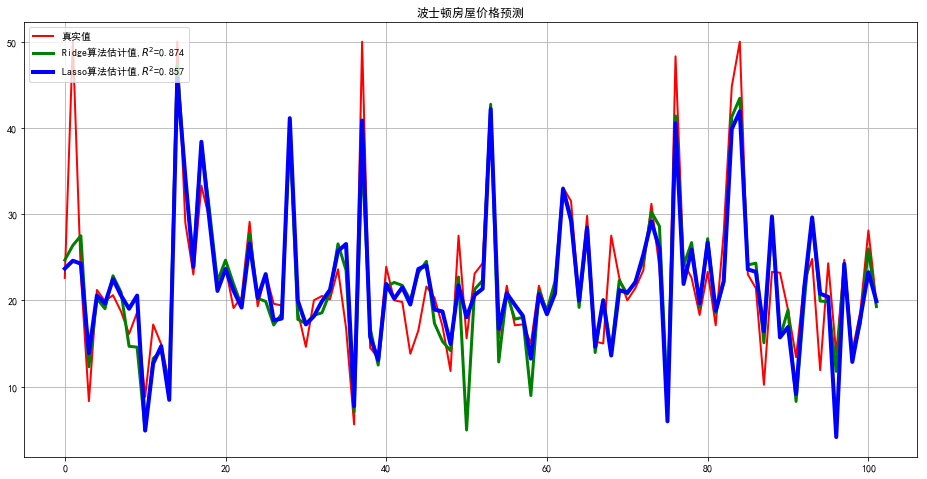

In [9]:
## Lasso和Ridge模型比较运行图表展示
titles = ['Ridge', 'Lasso']
colors = ['g-', 'b-']
plt.figure(figsize=(16,8), facecolor='w')
ln_x_test = range(len(x_test))

plt.plot(ln_x_test, y_test, 'r-', lw=2, label=u'真实值')
for t in range(2):
    # 获取模型并设置参数
    # GridSearchCV: 进行交叉验证，选择出最优的参数值出来
    # 第一个输入参数：进行参数选择的模型，param_grid： 用于进行模型选择的参数字段，要求是字典类型；cv: 进行几折交叉验证
    model = GridSearchCV(models[t], param_grid=parameters,cv=5, n_jobs=1)#五折交叉验证
    # 模型训练-网格搜索
    model.fit(x_train, y_train)
    # 模型效果值获取（最优参数）
    print ("%s算法:最优参数:" % titles[t],model.best_params_)
    print ("%s算法:R值=%.3f" % (titles[t], model.best_score_))
    # 模型预测
    y_predict = model.predict(x_test)
    # 画图
    plt.plot(ln_x_test, y_predict, colors[t], lw = t + 3, label=u'%s算法估计值,$R^2$=%.3f' % (titles[t],model.best_score_))
# 图形显示
plt.legend(loc = 'upper left')
plt.grid(True)
plt.title(u"波士顿房屋价格预测")
plt.show()

In [10]:
## 模型训练 ====> 单个Lasso模型（一阶特征选择）<2参数给定1阶情况的最优参数>
model = Pipeline([
            ('ss', StandardScaler()),
            ('poly', PolynomialFeatures(degree=1, include_bias=True, interaction_only=True)),
            ('linear', LassoCV(alphas=np.logspace(-3,1,20), fit_intercept=False))
        ])
# 模型训练
model.fit(x_train, y_train)


# 模型评测
## 数据输出
print ("参数:", list(zip(names,model.get_params('linear')['linear'].coef_)))
print ("截距:", model.get_params('linear')['linear'].intercept_)



参数: [('CRIM', 22.60059280920199), ('ZN', -0.935345576874145), ('INDUS', 1.0202352850146852), ('CHAS', -0.0), ('NOX', 0.5948313841546139), ('RM', -1.8002644875942362), ('AGE', 2.5861907995357285), ('DIS', -0.06495610824953962), ('RAD', -2.8017533936656513), ('TAX', 1.9343329692037554), ('PTRATIO', -1.7218677875512203), ('B', -2.276233462384299), ('LSTAT', 0.7028800300551542)]
截距: 0.0


In [11]:
# L1-norm是可以做特征选择的，主要原因在于：通过Lasso模型训练后，
# 有的参数是有可能出现为0的或者接近0的情况； 针对于这一批的特征，可以进行特征的删除操作
# df.drop(xx)
# NOTE: 自己实现参数值绝对值小于10^-1的所有特征属性删除；要求：不允许明确给定到底删除那一个特征属性
# df.drop(['CHAS', 'DIS']) ==> 不允许这样写
# 实际工作中，一般情况下，除非低于10^-6才会删除